In [57]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

print(sys.version)
print(np.__version__)

plt.style.use('seaborn-deep')

3.6.3 (default, Oct  3 2017, 21:45:48) 
[GCC 7.2.0]
1.14.0


In [77]:
dataframe = pd.read_json('reviews_Amazon_Instant_Video_5.json',lines=True)
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37126 entries, 0 to 37125
Data columns (total 9 columns):
asin              37126 non-null object
helpful           37126 non-null object
overall           37126 non-null int64
reviewText        37126 non-null object
reviewTime        37126 non-null object
reviewerID        37126 non-null object
reviewerName      36797 non-null object
summary           37126 non-null object
unixReviewTime    37126 non-null int64
dtypes: int64(2), object(7)
memory usage: 2.8+ MB
None


In [78]:
reviewerNames = list(dataframe['reviewerName'])
authorToNumReviews = {name:reviewerNames.count(name) for name in set(reviewerNames)}
dataframe['reviewLength'] = [len(text) for text in dataframe['reviewText']]
dataframe['reviewerNumberReviews'] = [authorToNumReviews[author] for author in dataframe['reviewerName']]
helpful_count = []
unhelpful_count = []
helpful_ratio = []
for (h,total) in dataframe['helpful']:
    helpful_count.append(h)
    unhelpful_count.append(total-h)
    if total == 0:
        helpful_ratio.append(None)
    else:
        helpful_ratio.append(h/(total))
dataframe['numberUnhelpful'] = unhelpful_count
dataframe['numberHelpful'] = helpful_count
dataframe['helpfulRatio'] = helpful_ratio
del dataframe['helpful']
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37126 entries, 0 to 37125
Data columns (total 13 columns):
asin                     37126 non-null object
overall                  37126 non-null int64
reviewText               37126 non-null object
reviewTime               37126 non-null object
reviewerID               37126 non-null object
reviewerName             36797 non-null object
summary                  37126 non-null object
unixReviewTime           37126 non-null int64
reviewLength             37126 non-null int64
reviewerNumberReviews    37126 non-null int64
numberUnhelpful          37126 non-null int64
numberHelpful            37126 non-null int64
helpfulRatio             13133 non-null float64
dtypes: float64(1), int64(6), object(6)
memory usage: 4.0+ MB
None


## Data Visualization

To better understand the data, it is helpful to visualize the different attributes individually. We chose to visualize 5 different attributes of our data: review score, number of people who found the review helpful, number of people who found the review unhelpful, the percentage of people who found the review helpful, and ONE OTHER.

### Visualizing Review Score

First, we visualize the review score (star rating that can take the value of 1, 2, 3, 4, or 5) for each review. Since review score is categorical, we use a histogram to show the frequency of each review score.

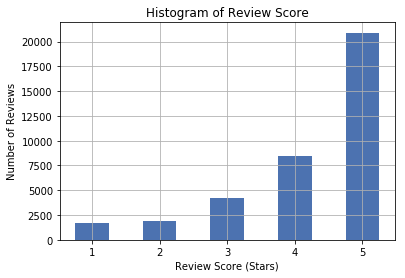

Number of five star reviews: 20890
Percent of five star reviews: 56.26784463718148 %
Number of one star reviews: 1718
Percent of one star reviews: 4.627484781554705 %


In [88]:
plt.figure()
hist_bins = [0.5,1.5,2.5,3.5,4.5,5.5]
dataframe['overall'].hist(bins=hist_bins,rwidth=0.5)
plt.title("Histogram of Review Score")
plt.xlabel("Review Score (Stars)")
plt.ylabel("Number of Reviews")
plt.show()
number_scores = len([score for score in dataframe['overall']])
number_one_stars = len([score for score in dataframe['overall'] if score==1])
number_five_stars = len([score for score in dataframe['overall'] if score==5])
print('Number of five star reviews:',number_five_stars)
print('Percent of five star reviews:',number_five_stars/number_scores*100,'%')
print('Number of one star reviews:',number_one_stars)
print('Percent of one star reviews:',number_one_stars/number_scores*100,'%')

The histogram shows that the review score of 5 is the most frequent in the observed data, occuring in 20,890 reviews, or 56% of the time. The review score of 1 is the least frequent, occuring in 1,718 reviews, or 4.6% of the time.

The frequency of each review score is directly related to the review score. That is to say, 5 star reviews are the most common, 4 star reviews the next most common, 3 star reviews the next most common, and so on. This indicates a bias in the data towards positive reviews. The positive slant in the reviews is not necessarily bad - it could simply mean that the products reviewed were good overall, or that reviewers are more likely to give positive reviews than negative reviews. However, it is important to keep the bias towards positive reviews in mind. Since fewer examples exist for negative reviews, it is possible that predicting negative reviews will be more difficult than predicting positive reviews.

### Visualizing Review Helpfulness

Next, we visualize two similar attributes: the number of people who found each review helpful and the number of people who found each review unhelpful. Since both of these variables are numeric, we visualize the distribution of each variable with a box plot.

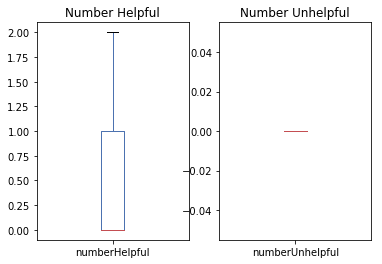

Maximum "helpful" tags: 484
Maximum "unhelpful" tags: 214


In [89]:
plt.figure()
plt.subplot(1, 2, 1)
helpful_boxplot = dataframe['numberHelpful'].plot(kind='box',showfliers=False)
plt.title('Number Helpful')
#plt.ylabel('Number Who Found the Review Helpful')
plt.subplot(1, 2, 2)
dataframe['numberUnhelpful'].plot(kind='box',showfliers=False)
plt.title('Number Unhelpful')
plt.show()
max_helpful = max(dataframe['numberHelpful'])
max_unhelpful = max(dataframe['numberUnhelpful'])
print('Maximum "helpful" tags:',max_helpful)
print('Maximum "unhelpful" tags:',max_unhelpful)

The above boxplots show that at least half of the reviews are not tagged as helpful, and at least three quarters of the reviews are not tagged as unhelpful. The majority of the data has no tags regarding helpfulness, which means predicting if a review is helpful or not from this dataset would be difficult.

Although most reviews have no tags, some of the reviews have a great many tags. For example, the largest number of helpful tags for a single review is 484, and the largest number of unhelpful tags for a single review is 214. To better visualize these outliers that don't show up in the boxplot, the two variables were also plotted in the histogram below.

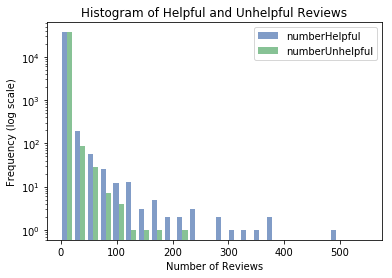

Number of reviews with over 100 "helpful" tags: 41
Number of reviews with over 100 "unhelpful" tags: 8


In [86]:
data=[dataframe['numberHelpful'],dataframe['numberUnhelpful']]
bins = np.linspace(0, 550, 25)
plt.yscale('log')
plt.hist(data, bins, alpha=0.7, label=['numberHelpful', 'numberUnhelpful'])
plt.legend(loc='upper right')
plt.title('Histogram of Helpful and Unhelpful Reviews')
plt.ylabel('Frequency (log scale)')
plt.xlabel('Number of Reviews')
plt.show()
helpful_over_100 = len([r for r in dataframe['numberHelpful'] if r>100])
unhelpful_over_100 = len([r for r in dataframe['numberUnhelpful'] if r>100])
print('Number of reviews with over 100 "helpful" tags:',helpful_over_100)
print('Number of reviews with over 100 "unhelpful" tags:',unhelpful_over_100)

The histogram uses a logarithmic scale on the y axis so that the outliers show up on the graph. The histogram shows that the vast majority of reviews are tagges as helpful or unhelpful fewer than 100 times. Only 41 reviews were tagged as helpful more than 100 times, and only 8 reviews were tagged as unhelpful more than 100 times.

A third variable that is directly related to the number of users who tagged a review helpful and the number of users who tagged a review unhelpful is the helpfulness ratio. The helpfulness ratio is simply the number of helpful tags divided by the total number of tags. Since the helpfulness ratio is numeric, it is visualized using a box plot.

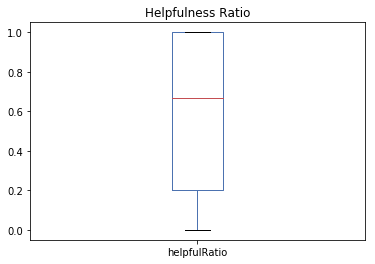

In [91]:
plt.figure()
dataframe['helpfulRatio'].plot(kind='box',showfliers=False)
plt.title('Helpfulness Ratio')
plt.show()

The box plot shows that the 25th percentile for the helpfulness ratio is 20%, the 50th percentile is 66%, and the 75th percentile is 100%. This means that at least 25% of the reviews that have been tagged as helpful or unhelpful at least once are considered helpful unanimously.

### Number of reviews the reviewer has authored

Since the variable is numeric, its distribution is visualized by a boxplot.

      overall  unixReviewTime  reviewLength  reviewerNumberReviews  \
0.00      1.0    9.754560e+08           4.0                    1.0   
0.25      4.0    1.367798e+09         145.0                    5.0   
0.50      5.0    1.384992e+09         232.0                    7.0   
0.75      5.0    1.394150e+09         484.0                   11.0   
1.00      5.0    1.406074e+09       18152.0                  645.0   

      numberUnhelpful  numberHelpful  helpfulRatio  
0.00              0.0            0.0      0.000000  
0.25              0.0            0.0      0.200000  
0.50              0.0            0.0      0.666667  
0.75              0.0            1.0      1.000000  
1.00            214.0          484.0      1.000000  


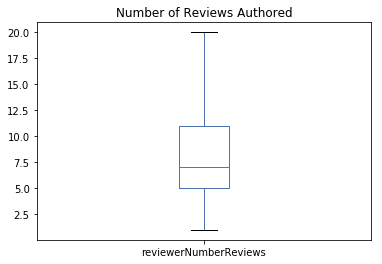

In [92]:
plt.figure()
unhelpful_boxplot = dataframe['reviewerNumberReviews'].plot(kind='box',showfliers=False)
plt.title('Number of Reviews Authored')
#print(dataframe.quantile([0,0.25,0.5,0.75,1]))
#print([r for r in dataframe['reviewerNumberReviews'] if r > 100])

The boxplot shows that the number of reviews each reviewer has authored has a 25th percentile of 5, a 50th percentile of 7, and a 75th percentile of 11. This means that 75% or more of reviewers have written 11 or fewer reviews.

Some reviewers, however, have written significantly more reviews.

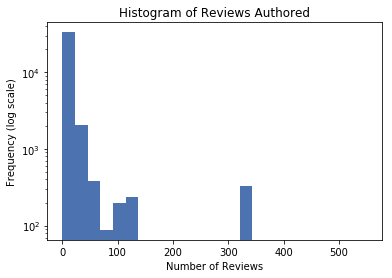

In [95]:
bins = np.linspace(0, 550, 25)
plt.yscale('log')
plt.hist(dataframe['reviewerNumberReviews'], bins)
plt.title('Histogram of Reviews Authored')
plt.ylabel('Frequency (log scale)')
plt.xlabel('Number of Reviews')
plt.show()
